# Volume-Weighted Average Price (VWAP) Indicator

**Formula**: VWAP = Σ(Typical Price × Volume) / Σ(Volume)
where Typical Price = (High + Low + Close) / 3

**Interpretation:**
- Dynamic support/resistance: Price tends to revert to VWAP
- Trend direction: Price above VWAP = bullish, below = bearish
- Institutional quality: Execution benchmark for fund managers
- Volume importance: Only moves with traded volume, ignores low-volume spikes

**Key signals**:
- Price bouncing off VWAP = support/resistance
- Breaking above/below VWAP = potential trend change
- Anchored VWAP from significant events = pivot levels
- Convergence = consolidation (decision point)

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from indikator import vwap, vwap_anchored

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## Scenario 1: Price Bouncing Off VWAP as Support

KeyError: 'open'

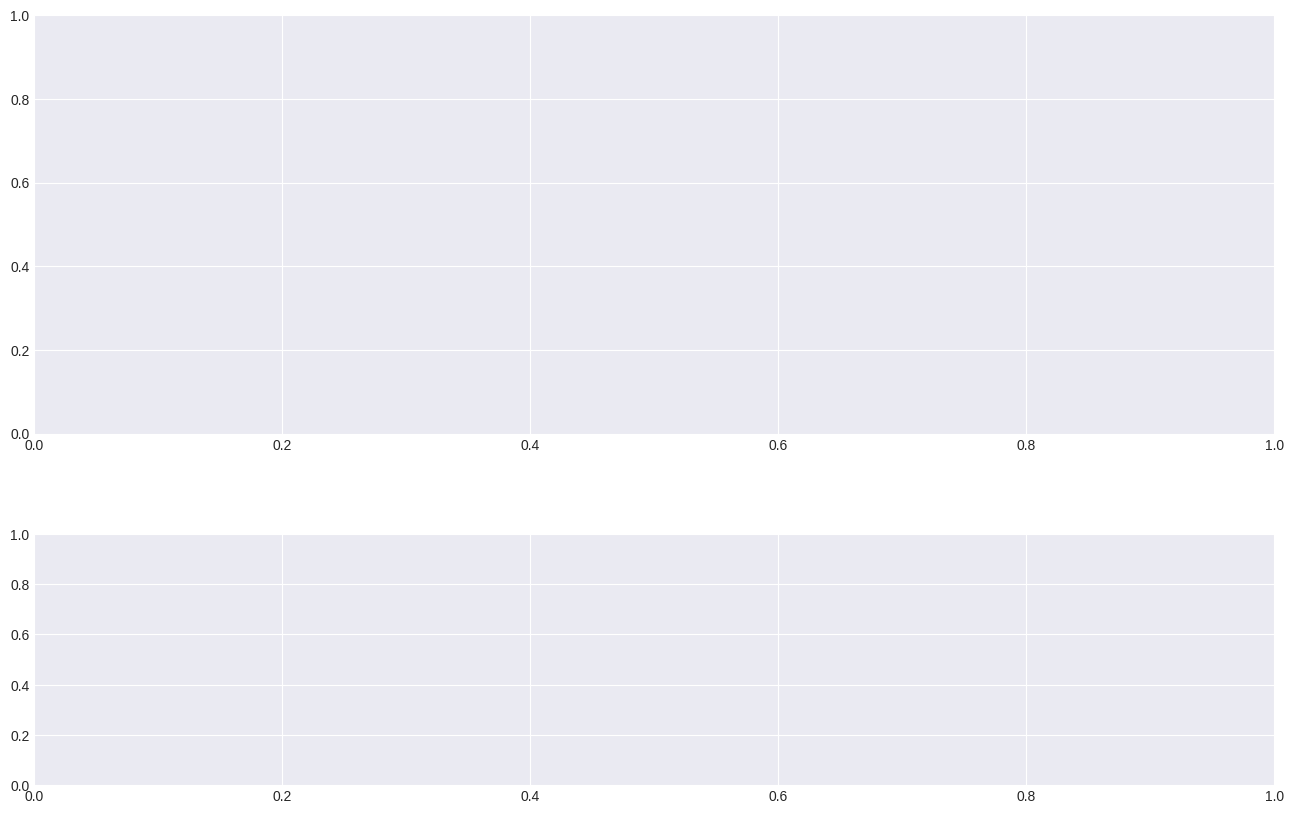

In [2]:
# Create intraday price action with bounces off VWAP
n = 100
dates = pd.date_range('2024-01-15 09:30', periods=n, freq='5min')

# Controlled price with VWAP-like behavior
# Start around 105, trend up with bounces
base_price = 105 + np.cumsum(np.concatenate([
    np.ones(25) * 0.15 + np.random.randn(25) * 0.3,   # Uptrend with noise
    np.ones(15) * -0.05 + np.random.randn(15) * 0.4,  # Pullback
    np.ones(25) * 0.12 + np.random.randn(25) * 0.3,   # Resume uptrend
    np.random.randn(35) * 0.2                          # Consolidation
]))

closes = base_price[:n]
opens = closes + np.random.randn(n) * 0.25
highs = np.maximum(opens, closes) + np.abs(np.random.randn(n)) * 0.4
lows = np.minimum(opens, closes) - np.abs(np.random.randn(n)) * 0.4

# Volume profile: higher during uptrend, lower during consolidation
volumes = np.concatenate([
    1500 + np.abs(np.random.randn(25)) * 300,   # High volume uptrend
    800 + np.abs(np.random.randn(15)) * 200,    # Lower volume pullback
    1400 + np.abs(np.random.randn(25)) * 280,   # High volume resume
    600 + np.abs(np.random.randn(35)) * 150     # Low volume consolidation
])

df = pd.DataFrame({
    'high': highs,
    'low': lows,
    'close': closes,
    'volume': volumes
}, index=dates)

result = vwap(df, session_freq='D')

# Plot
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 1, height_ratios=[2.5, 1.5], hspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Candlesticks
for i in range(len(df)):
    color = 'green' if df['close'].iloc[i] >= df['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df['low'].iloc[i], df['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df['close'].iloc[i] - df['open'].iloc[i])
    if height < 0.05:
        height = 0.1
    bottom = min(df['open'].iloc[i], df['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# VWAP line
ax1.plot(range(len(result)), result['vwap'], 'purple', linewidth=2.5, label='VWAP', zorder=5)

# Highlight bounces
ax1.axvspan(0, 25, alpha=0.1, color='green', label='Uptrend (High Vol)')
ax1.axvspan(25, 40, alpha=0.1, color='red', label='Pullback')
ax1.axvspan(40, 65, alpha=0.1, color='green', label='Resume (High Vol)')
ax1.axvspan(65, 100, alpha=0.1, color='gray', label='Consolidation (Low Vol)')

ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('VWAP: Dynamic Support/Resistance During Intraday Trading', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df))

# Distance from VWAP
distance = result['close'] - result['vwap']
colors = ['green' if d > 0 else 'red' for d in distance]
ax2.bar(range(len(distance)), distance, color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axhline(0, color='black', linestyle='-', linewidth=1.5)
ax2.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax2.set_ylabel('Price - VWAP', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df))

plt.tight_layout()
plt.show()

# Statistics
mean_distance = distance.abs().mean()
max_distance = distance.abs().max()
above_vwap = (distance > 0).sum()
below_vwap = (distance < 0).sum()

print('VWAP Analysis: Price Bouncing Pattern')
print('=' * 50)
print(f'Mean distance from VWAP: ${mean_distance:.2f}')
print(f'Max distance from VWAP: ${max_distance:.2f}')
print(f'Bars above VWAP: {above_vwap} ({above_vwap/len(df)*100:.1f}%)')
print(f'Bars below VWAP: {below_vwap} ({below_vwap/len(df)*100:.1f}%)')
print(f'\nVWAP Range: ${result["vwap"].min():.2f} - ${result["vwap"].max():.2f}')
print(f'Price Range: ${df["close"].min():.2f} - ${df["close"].max():.2f}')

## Scenario 2: Anchored VWAP from a Significant Event (Earnings Breakout)

In [ ]:
# Create multi-day price data with earnings gap
n2 = 120
dates2 = pd.date_range('2024-01-10 09:30', periods=n2, freq='5min')

# Pre-earnings consolidation (bars 0-30)
pre_earnings = 102 + np.random.randn(31) * 0.3

# Earnings gap up (bar 31) - simulate overnight gap
gap_price = pre_earnings[-1] + 3.5  # 3.5 point gap

# Post-earnings trend up then consolidation
post_earnings = gap_price + np.cumsum(np.concatenate([
    np.ones(35) * 0.08 + np.random.randn(35) * 0.4,   # Trend higher
    np.random.randn(34) * 0.25                        # Consolidate
]))

closes2 = np.concatenate([pre_earnings, post_earnings[1:]])
opens2 = closes2 + np.random.randn(n2) * 0.25
highs2 = np.maximum(opens2, closes2) + np.abs(np.random.randn(n2)) * 0.4
lows2 = np.minimum(opens2, closes2) - np.abs(np.random.randn(n2)) * 0.4

# Volume: normal before, surge on gap, then settles
volumes2 = np.concatenate([
    500 + np.abs(np.random.randn(31)) * 100,      # Pre-earnings low
    2500 + np.abs(np.random.randn(35)) * 400,     # Earnings spike
    1000 + np.abs(np.random.randn(34)) * 200      # Normal post
])

df2 = pd.DataFrame({
    'high': highs2,
    'low': lows2,
    'close': closes2,
    'volume': volumes2
}, index=dates2)

# Calculate both session VWAP and anchored VWAP
result_session = vwap(df2, session_freq='D')
result_anchored = vwap_anchored(df2, anchor_index=31)  # Start from earnings gap

# Plot
fig = plt.figure(figsize=(16, 11))
gs = GridSpec(3, 1, height_ratios=[2.5, 1.5, 1.5], hspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Candlesticks
for i in range(len(df2)):
    color = 'green' if df2['close'].iloc[i] >= df2['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df2['low'].iloc[i], df2['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df2['close'].iloc[i] - df2['open'].iloc[i])
    if height < 0.05:
        height = 0.1
    bottom = min(df2['open'].iloc[i], df2['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

# VWAP lines
ax1.plot(range(len(result_session)), result_session['vwap'], 'blue', linewidth=2, label='Session VWAP', linestyle='--', alpha=0.7)
ax1.plot(range(31, len(result_anchored)), result_anchored['vwap_anchored'].iloc[31:], 'purple', linewidth=2.5, label='Anchored VWAP (From Earnings)', zorder=5)

# Mark earnings event
ax1.axvline(31, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Earnings Gap')
ax1.axvspan(0, 31, alpha=0.08, color='gray', label='Pre-Earnings')
ax1.axvspan(31, 66, alpha=0.08, color='green', label='Post-Earnings Trend')
ax1.axvspan(66, 120, alpha=0.08, color='orange', label='Consolidation')

ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('Anchored VWAP: Significant Event (Earnings Breakout)', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=10, ncol=2)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df2))

# Volume
colors_vol = ['red' if i == 31 else 'green' if i > 31 and i < 66 else 'orange' for i in range(len(df2))]
ax2.bar(range(len(volumes2)), volumes2, color=colors_vol, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axvline(31, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax2.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df2))

# Distance from Anchored VWAP
anchored_distance = result_anchored['close'] - result_anchored['vwap_anchored']
colors_dist = ['gray' if i < 31 else ('green' if d > 0 else 'red') for i, d in enumerate(anchored_distance)]
ax3.bar(range(len(anchored_distance)), anchored_distance, color=colors_dist, alpha=0.7, edgecolor='black', linewidth=0.5)
ax3.axhline(0, color='black', linestyle='-', linewidth=1.5)
ax3.axvline(31, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('Price - Anchored VWAP', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-1, len(df2))

plt.tight_layout()
plt.show()

# Analysis
anchored_portion = anchored_distance.iloc[31:]
print('\nAnchored VWAP Analysis: Post-Earnings')
print('=' * 50)
print(f'Earnings gap: ${closes2[31] - closes2[30]:.2f}')
print(f'Gap magnitude: {(closes2[31] - closes2[30]) / closes2[30] * 100:.2f}%')
print(f'\nPost-earnings high: ${closes2[31:66].max():.2f}')
print(f'Anchored VWAP at peak: ${result_anchored["vwap_anchored"].iloc[31:66].max():.2f}')
print(f'Distance at peak: ${anchored_portion.iloc[:35].max():.2f}')
print(f'\nConsolidation phase mean distance: ${anchored_portion.iloc[35:].abs().mean():.2f}')
print(f'Price currently: {"above" if anchored_distance.iloc[-1] > 0 else "below"} anchored VWAP by ${abs(anchored_distance.iloc[-1]):.2f}')

## Key Takeaways

### VWAP vs Moving Averages
| Feature | VWAP | SMA | EMA |
|---------|------|-----|-----|
| Volume weighting | Yes (volume-based) | No (equal weight) | No (time-based) |
| Institutional use | Execution benchmark | General trend | Momentum |
| Support/Resistance | Dynamic, sticky | Loose | Loose |
| Calculation | Volume-weighted | Simple average | Exponential decay |
| Best timeframe | Intraday (minutes/hours) | Daily/Weekly | Any |
| Reset frequency | Session-based | Continuous | Continuous |

### Session Frequency Selection
- **'D' (Daily)**: Reset at market open - standard for intraday trading
- **'W' (Weekly)**: Reset Monday - good for swing trades across weeks
- **'ME' (Month-End)**: Reset monthly - useful for position traders

### Trading Strategies

**1. VWAP Bounce Trading (Intraday)**
- Entry: Price touches VWAP with reversal candlestick
- Exit: Previous high/low or 1.5x ATR from entry
- Best: Low-volatility consolidation phases

**2. VWAP Breakout Trading**
- Entry: Price breaks above/below VWAP with volume surge
- Confirmation: Close beyond VWAP + distance > 1.5x average
- Exit: Pullback to VWAP or profit target

**3. Anchored VWAP Strategy (Swing Trading)**
- Anchor from: Earnings gap, breakout, major news
- Use as: Progressive resistance/support
- Trade: Retest and hold of anchored VWAP
- Example: Earnings gap up → anchor VWAP from gap → trade bounces

**4. Volume Profile Analysis**
- High volume at VWAP = strong support/resistance
- Low volume gaps = weak levels, likely to retest
- Volume surge above/below VWAP = breakout confirmation

### Signal Interpretation
- **Price > VWAP**: Bullish (good prices have been paid by volume)
- **Price < VWAP**: Bearish (poor prices have been paid)
- **Price hugging VWAP**: Consolidation/indecision
- **Large distance from VWAP**: Potential reversion trade
- **Anchored VWAP rising**: Higher lows = uptrend (anchored support)
- **Anchored VWAP falling**: Lower highs = downtrend (anchored resistance)

### Risk Management
- **Stop-Loss**: 0.5-1.0x average distance from VWAP
- **Position Size**: Reduce size in low-volume sessions (wide swings)
- **Time Decay**: VWAP becomes less relevant far into session (less data)
- **Gap Risk**: Overnight gaps invalidate previous VWAP; use anchored instead

### Implementation Best Practices
1. **Combine with price action**: VWAP alone can give false signals
2. **Multi-timeframe**: Confirm on multiple bar intervals (5min + 15min)
3. **Volume confirmation**: Bounces/breaks should show volume spikes
4. **Avoid low-volume sessions**: VWAP becomes unstable with thin trading
5. **Backtest threshold distances**: Optimal distance varies by asset/market
6. **Use anchored VWAP for events**: Earnings, gap events, major news
7. **Track VWAP slope**: Rising VWAP = stronger uptrend confidence

## Feature Showcase: Safety & Configuration

In [ ]:
# Configuration & Validation Showcase
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from indikator import vwap

# 1. Configuration with .Config()
print(f"--- Custom vwap Configuration ---")
# Even without hyperparameters, Config ensures type safety
custom_vwap = vwap.Config().make()
print(f"Created: {custom_vwap}")

# 2. Validation Safety
print(f"--- Input Validation Safety ---")
try:
    # Attempt to use invalid data (missing columns)
    invalid_data = pd.DataFrame({'close': [100]}) # Missing high/low/volume
    print("Attempting calculation with invalid inputs...")
    vwap(invalid_data)
except Exception as e:
    # The @validated decorator automatically catches the issue
    print(f"✓ Validator caught error as expected:%%! {e}")
